Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Download the data from the following URL

https://drive.google.com/file/d/1yqoGqDRvv5xbfgkJKmp5nmquKYrdaLfl/view?usp=sharing

Read and assign it to a variable called chipo.

In [65]:
from google.colab import files
uploaded = files.upload()

Saving chipotle.tsv to chipotle.tsv


In [124]:
chipo = pd.read_csv('chipotle.tsv', sep='\t')
print(chipo)

      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                                          [Clementine]  

See the first 10 entries

In [67]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [68]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


What is the number of observations in the dataset ?

Answer: 4622

In [69]:
num_obv = chipo.shape[0]
num_obv

4622

What is the number of columns in the dataset ?

Answer: 5

In [70]:
num_col = chipo.shape[1]
num_col

5

Print the name of all the columns.

In [71]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

How is the dataset indexed ?

Answer: RangeIndex(start=0, stop=4622, step=1)

In [72]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Which was the most-ordered item ?

Answer: Chicken Bowl

In [73]:
most_order = chipo['item_name'].value_counts()
print(most_order.head())

item_name
Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: count, dtype: int64


In [74]:
print(most_order.index[0])

Chicken Bowl


For the most-ordered item, how many items were ordered ?

761

In [75]:
most_order_total = chipo.groupby('item_name')['quantity'].sum()
print(most_order_total['Chicken Bowl'])

761


What was the most ordered item in the choice_description column ?

Answer: [Diet Coke]

In [76]:
most_choice = chipo['choice_description'].value_counts()
print(most_choice.index[0])

[Diet Coke]


How many items were orderd in total ?

Answer: 4972

In [77]:
order_total = chipo['quantity'].sum()
print(order_total)

4972


Turn the item price into a float

In [78]:
chipo['item_price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4622 entries, 0 to 4621
Series name: item_price
Non-Null Count  Dtype 
--------------  ----- 
4622 non-null   object
dtypes: object(1)
memory usage: 36.2+ KB


In [79]:
chipo['item_price'].head(3)

,item_price
0,$2.39
1,$3.39
2,$3.39


In [80]:
# Step 1: Remove all characters except digits and decimal points
chipo['item_price'] = chipo['item_price'].str.replace(r'[^\d\.]', '', regex=True).str.strip()

In [81]:
chipo['item_price'] = chipo['item_price'].astype(float)

In [82]:
chipo['item_price'].head(3)

,item_price
0,2.39
1,3.39
2,3.39


How much was the revenue for the period in the dataset ?

Answer: Revenue was: $39237.02

In [83]:
chipo['order_revenue'] = chipo['item_price'] * chipo['quantity']
total_revenue = chipo['order_revenue'].sum()
print(f"Revenue was: ${total_revenue:.2f}")

Revenue was: $39237.02


How many orders were made in the period ?

Answer: 1834

In [84]:
total_orders = chipo['order_id'].nunique()
total_orders

1834

What is the average revenue amount per order ?

In [85]:
average_revenue = total_revenue / total_orders
average_revenue

21.39423118865867

How many different items are sold ?

Answer: 50

In [86]:
total_item = chipo['item_name'].nunique()
total_item

50

How many products cost more than $10.00 ?

1. clean the item_price column and transform it in a float
2. reassign the column with the cleaned prices
3. delete the duplicates in item_name and quantity
4. select only the products with quantity equals to 1

Answer: 12

In [87]:
chipo['item_price'].isnull().sum()

0

In [88]:
chipo['item_price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4622 entries, 0 to 4621
Series name: item_price
Non-Null Count  Dtype  
--------------  -----  
4622 non-null   float64
dtypes: float64(1)
memory usage: 36.2 KB


In [89]:
# Step 3: Delete duplicates based on 'item_name' and 'quantity'
chipo_cleaned = chipo.drop_duplicates(subset=['item_name', 'quantity'], keep='first')

# Step 4: Select only the products with quantity equal to 1
products_quantity_1 = chipo_cleaned[chipo_cleaned['quantity'] == 1]

# Step 5: Count how many products cost more than $10.00
num_products_above_10 = products_quantity_1[products_quantity_1['item_price'] > 10.00].shape[0]

# Print the result
print(num_products_above_10)

12


What is the price of each item ?

1. delete the duplicates in item_name and quantity
2. select only the products with quantity equals to 1
3. select only the item_name and item_price columns
4. sort the values from the most to less expensive

In [90]:
items_price = products_quantity_1[['item_name', 'item_price']]
items_price_sorted = items_price.sort_values(by='item_price', ascending=False)
print(items_price_sorted)

                                  item_name  item_price
606                        Steak Salad Bowl       11.89
1229                    Barbacoa Salad Bowl       11.89
1132                    Carnitas Salad Bowl       11.89
7                             Steak Burrito       11.75
168                   Barbacoa Crispy Tacos       11.75
39                            Barbacoa Bowl       11.75
738                       Veggie Soft Tacos       11.25
186                       Veggie Salad Bowl       11.25
62                              Veggie Bowl       11.25
57                           Veggie Burrito       11.25
250                           Chicken Salad       10.98
5                              Chicken Bowl       10.98
8                          Steak Soft Tacos        9.25
554                   Carnitas Crispy Tacos        9.25
237                     Carnitas Soft Tacos        9.25
56                      Barbacoa Soft Tacos        9.25
92                       Steak Crispy Tacos     

Sort by the name of the item

In [91]:
items_price_sorted_by_name = items_price.sort_values(by='item_name', ascending=True)
print(items_price_sorted_by_name)

                                  item_name  item_price
298                       6 Pack Soft Drink        6.49
39                            Barbacoa Bowl       11.75
21                         Barbacoa Burrito        8.99
168                   Barbacoa Crispy Tacos       11.75
1229                    Barbacoa Salad Bowl       11.89
56                      Barbacoa Soft Tacos        9.25
34                            Bottled Water        1.09
673                                    Bowl        7.40
510                                 Burrito        7.40
28                              Canned Soda        1.09
263                       Canned Soft Drink        1.25
33                            Carnitas Bowl        8.99
27                         Carnitas Burrito        8.99
554                   Carnitas Crispy Tacos        9.25
3750                         Carnitas Salad        8.99
1132                    Carnitas Salad Bowl       11.89
237                     Carnitas Soft Tacos     

What was the quantity of the most expensive item ordered ?

In [92]:
most_expensive_item = chipo.loc[chipo['item_price'].idxmax()]
quantity_most_expensive_item = most_expensive_item['quantity']
print(quantity_most_expensive_item)

15


How many times was a Veggie Salad Bowl ordered ?

Answer: 18

In [93]:
veggie_salad_bowl_orders = chipo[chipo['item_name'] == 'Veggie Salad Bowl']
total_veggie_salad_bowl_orders = veggie_salad_bowl_orders['quantity'].sum()
print(total_veggie_salad_bowl_orders)

18


How many times did someone order more than one Canned Soda ?

Answer: 20

In [94]:
canned_soda_orders = chipo[chipo['item_name'] == 'Canned Soda']
# print(canned_soda_orders)
canned_more_one = canned_soda_orders[canned_soda_orders['quantity'] > 1]
# print(canned_more_one)
total_canned_more_one = canned_more_one.shape[0]
print(total_canned_more_one)

20


Create a histogram of the top 5 items bought

In [95]:
sort_order = most_order_total.sort_values(ascending=False)
top_5_items = sort_order.head(5)
print(top_5_items)

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64


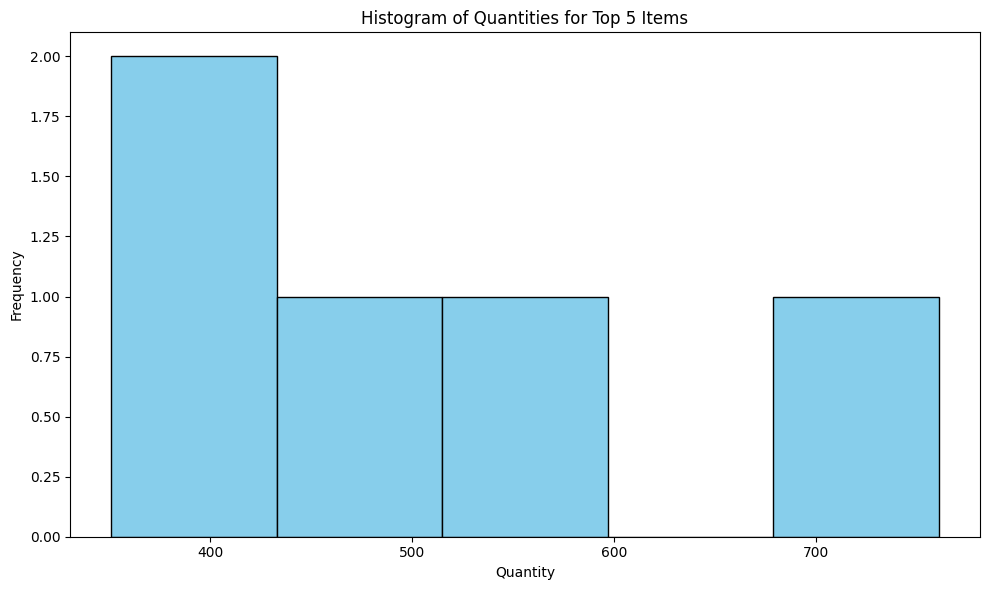

In [128]:
quantities = top_5_items.values

plt.figure(figsize=(10, 6))
plt.hist(quantities, bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of Quantities for Top 5 Items')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.tight_layout()

plt.show()

Create a scatterplot with the number of items orderered per order price

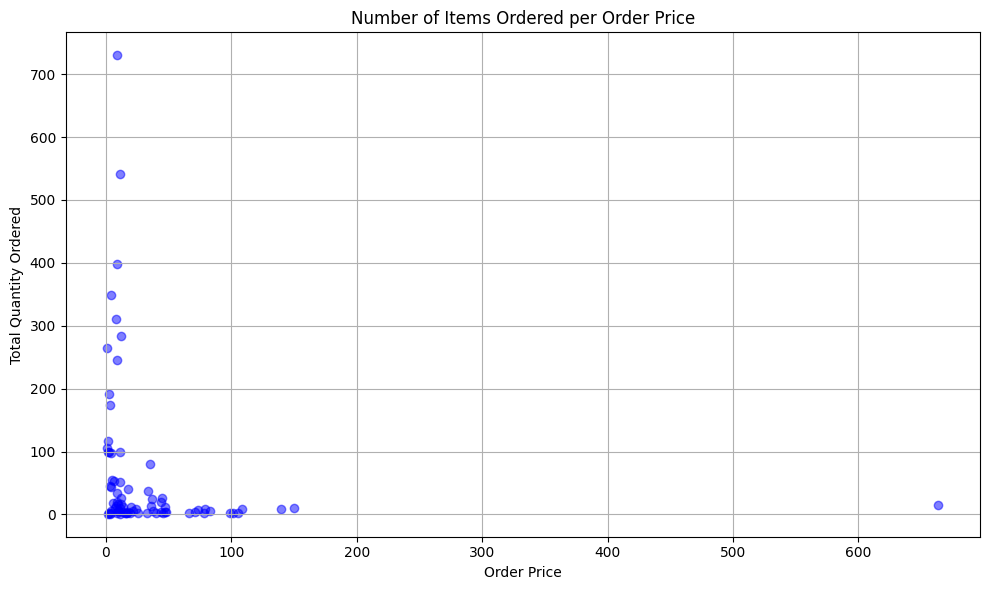

In [97]:
quantity_per_order = chipo.groupby('order_revenue')['quantity'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(quantity_per_order['order_revenue'], quantity_per_order['quantity'], alpha=0.5, color='blue')
plt.title('Number of Items Ordered per Order Price')
plt.xlabel('Order Price')
plt.ylabel('Total Quantity Ordered')
plt.grid(True)
plt.tight_layout()

plt.show()

Create a question and a graph to answer your own question.

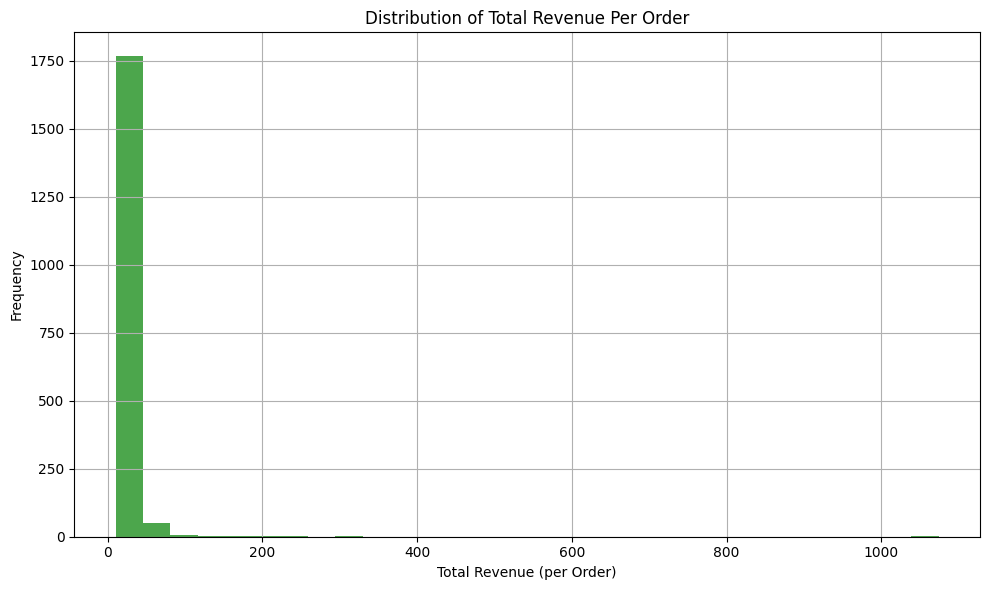

In [99]:
## Question: What is the distribution of total revenue per order in the dataset?

revenue_per_order = chipo.groupby('order_id')['order_revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.hist(revenue_per_order['order_revenue'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Total Revenue Per Order')
plt.xlabel('Total Revenue (per Order)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

plt.show()

Download the data from the following URL

https://drive.google.com/file/d/1IliBBnlvWdyqoNHpKsPWRrwynwlp69Sm/view?usp=sharing

Read and assign it to a variable called users.

In [101]:
from google.colab import files
uploaded = files.upload()

Saving users.csv to users.csv


In [102]:
users = pd.read_csv('users.csv', sep='|')
users.head(3)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067


Discover what is the mean age per occupation ?

In [103]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [104]:
mean_age_per_occupation = users.groupby('occupation')['age'].mean().reset_index()
print(mean_age_per_occupation)

       occupation        age
0   administrator  38.746835
1          artist  31.392857
2          doctor  43.571429
3        educator  42.010526
4        engineer  36.388060
5   entertainment  29.222222
6       executive  38.718750
7      healthcare  41.562500
8       homemaker  32.571429
9          lawyer  36.750000
10      librarian  40.000000
11      marketing  37.615385
12           none  26.555556
13          other  34.523810
14     programmer  33.121212
15        retired  63.071429
16       salesman  35.666667
17      scientist  35.548387
18        student  22.081633
19     technician  33.148148
20         writer  36.311111


Discover the Male ratio per occupation and sort it from the most to the least

In [105]:
users['is_male'] = users['gender'].apply(lambda x: 1 if x == 'M' else 0)
male_ratio_per_occupation = users.groupby('occupation')['is_male'].mean().reset_index()
male_ratio_per_occupation = male_ratio_per_occupation.sort_values(by='is_male', ascending=False)
male_ratio_per_occupation.columns = ['Occupation', 'Male Ratio']
print(male_ratio_per_occupation)

       Occupation  Male Ratio
2          doctor    1.000000
4        engineer    0.970149
19     technician    0.962963
15        retired    0.928571
14     programmer    0.909091
6       executive    0.906250
17      scientist    0.903226
5   entertainment    0.888889
9          lawyer    0.833333
16       salesman    0.750000
3        educator    0.726316
18        student    0.693878
13          other    0.657143
11      marketing    0.615385
20         writer    0.577778
12           none    0.555556
0   administrator    0.544304
1          artist    0.535714
10      librarian    0.431373
7      healthcare    0.312500
8       homemaker    0.142857


For each occupation, calculate the minimum and maximum ages

In [106]:
age_stats_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max']).reset_index()
age_stats_per_occupation.columns = ['Occupation', 'Min Age', 'Max Age']
print(age_stats_per_occupation)

       Occupation  Min Age  Max Age
0   administrator       21       70
1          artist       19       48
2          doctor       28       64
3        educator       23       63
4        engineer       22       70
5   entertainment       15       50
6       executive       22       69
7      healthcare       22       62
8       homemaker       20       50
9          lawyer       21       53
10      librarian       23       69
11      marketing       24       55
12           none       11       55
13          other       13       64
14     programmer       20       63
15        retired       51       73
16       salesman       18       66
17      scientist       23       55
18        student        7       42
19     technician       21       55
20         writer       18       60


For each combination of occupation and gender, calculate the mean age

In [107]:
mean_age_per_occupation_gender = users.groupby(['occupation', 'gender'])['age'].mean().reset_index()
mean_age_per_occupation_gender.columns = ['Occupation', 'Gender', 'Mean Age']
print(mean_age_per_occupation_gender)

       Occupation Gender   Mean Age
0   administrator      F  40.638889
1   administrator      M  37.162791
2          artist      F  30.307692
3          artist      M  32.333333
4          doctor      M  43.571429
5        educator      F  39.115385
6        educator      M  43.101449
7        engineer      F  29.500000
8        engineer      M  36.600000
9   entertainment      F  31.000000
10  entertainment      M  29.000000
11      executive      F  44.000000
12      executive      M  38.172414
13     healthcare      F  39.818182
14     healthcare      M  45.400000
15      homemaker      F  34.166667
16      homemaker      M  23.000000
17         lawyer      F  39.500000
18         lawyer      M  36.200000
19      librarian      F  40.000000
20      librarian      M  40.000000
21      marketing      F  37.200000
22      marketing      M  37.875000
23           none      F  36.500000
24           none      M  18.600000
25          other      F  35.472222
26          other      M  34

For each occupation present the percentage of women and men

In [ ]:
gender_count_per_occupation = users.groupby(['occupation', 'gender']).size().unstack(fill_value=0)
total_per_occupation = gender_count_per_occupation.sum(axis=1)
gender_percentage_per_occupation = gender_count_per_occupation.div(total_per_occupation, axis=0) * 100


               Percentage of Females  Percentage of Males
occupation                                               
administrator              45.569620            54.430380
artist                     46.428571            53.571429
doctor                      0.000000           100.000000
educator                   27.368421            72.631579
engineer                    2.985075            97.014925
entertainment              11.111111            88.888889
executive                   9.375000            90.625000
healthcare                 68.750000            31.250000
homemaker                  85.714286            14.285714
lawyer                     16.666667            83.333333
librarian                  56.862745            43.137255
marketing                  38.461538            61.538462
none                       44.444444            55.555556
other                      34.285714            65.714286
programmer                  9.090909            90.909091
retired       

Download the data from the following URL

https://drive.google.com/file/d/1Nf5qPvISvBubc6e3vpiK7pYn4WOFXzij/view?usp=sharing

Read and assign it to a variable called crimes.

In [108]:
from google.colab import files
uploaded = files.upload()

Saving crimes.csv to crimes (1).csv


In [109]:
crimes = pd.read_csv('crimes.csv')
crimes.head(3)

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800


What is the type of the columns ?

In [110]:
crimes.dtypes

,0
Year,int64
Population,int64
Total,int64
Violent,int64
Property,int64
Murder,int64
Forcible_Rape,int64
Robbery,int64
Aggravated_assault,int64
Burglary,int64


Convert the type of the column Year to datetime64

In [111]:
crimes['Year'] = pd.to_datetime(crimes['Year'], format='%Y')
crimes.dtypes

,0
Year,datetime64[ns]
Population,int64
Total,int64
Violent,int64
Property,int64
Murder,int64
Forcible_Rape,int64
Robbery,int64
Aggravated_assault,int64
Burglary,int64


Set the Year column as the index of the dataframe

In [112]:
crimes = crimes.set_index('Year')
crimes.head(5)

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


Delete the Total column

In [113]:
crimes = crimes.drop('Total', axis=1)

In [114]:
crimes.columns

Index(['Population', 'Violent', 'Property', 'Murder', 'Forcible_Rape',
       'Robbery', 'Aggravated_assault', 'Burglary', 'Larceny_Theft',
       'Vehicle_Theft'],
      dtype='object')

Group the year by decades and sum the values

In [115]:
crimes['Decades'] = (crimes.index.year // 10 * 10).astype('str') + 's'
sum_of_decades = crimes.groupby('Decades').sum()
print(sum_of_decades)

         Population   Violent   Property  Murder  Forcible_Rape  Robbery  \
Decades                                                                    
1960s    1915053175   4134930   45160900  106180         236720  1633510   
1970s    2121193298   9607930   91383800  192230         554570  4159020   
1980s    2371370069  14074328  117048900  206439         865639  5383109   
1990s    2612825258  17527048  119053499  211664         998827  5748930   
2000s    2947969117  13968056  100944369  163068         922499  4230366   
2010s    1570146307   6072017   44095950   72867         421059  1749809   

         Aggravated_assault  Burglary  Larceny_Theft  Vehicle_Theft  
Decades                                                              
1960s               2158520  13321100       26547700        5292100  
1970s               4702120  28486000       53157800        9739900  
1980s               7619130  33073494       72040253       11935411  
1990s              10568963  26750015    

What is the most dangerous decade to live in the US ?

In [116]:
sum_of_decades['Total_Crimes'] = (sum_of_decades['Violent'] + sum_of_decades['Property'] +
                              sum_of_decades['Murder'] + sum_of_decades['Forcible_Rape'] +
                              sum_of_decades['Robbery'] + sum_of_decades['Aggravated_assault'] +
                              sum_of_decades['Burglary'] + sum_of_decades['Larceny_Theft'] +
                              sum_of_decades['Vehicle_Theft'])

print(sum_of_decades['Total_Crimes'])

max_total_crimes = sum_of_decades['Total_Crimes'].max()
most_dangerous_decade = sum_of_decades[sum_of_decades['Total_Crimes'] == max_total_crimes].index[0]

print("\n")
print(f"The most dangerous decade to live in the US, based on total crimes, is the {most_dangerous_decade} with a total of {max_total_crimes} crimes.")

Decades
1960s     98591660
1970s    201983370
1980s    262246703
1990s    273162730
2000s    229828783
2010s    100271792
Name: Total_Crimes, dtype: int64


The most dangerous decade to live in the US, based on total crimes, is the 1990s with a total of 273162730 crimes.


Create 3 differents Series, each of length 100, as follows:

1. The first a random number from 1 to 4
2. The second a random number from 1 to 3
3. The third a random number from 10,000 to 30,000

In [117]:
series_1 = pd.Series(np.random.randint(1, 5, 100))
series_2 = pd.Series(np.random.randint(1, 3, 100))
series_3 = pd.Series(np.random.randint(10000, 30001, 100))

Let's create a DataFrame by joinning the Series by column

In [118]:
df = pd.DataFrame({
    'Series1': series_1,
    'Series2': series_2,
    'Series3': series_3
})

df.head(3)

,Series1,Series2,Series3
0,1,1,11855
1,2,2,20495
2,3,2,11959


Change the name of the columns to bedrooms, bathrooms, price_sqr_meter

In [ ]:
df = pd.DataFrame({
    'bedrooms': series_1,
    'bathrooms': series_2,
    'price_sqr_meter': series_3
})

df.columns

Index(['bedrooms', 'bathrooms', 'price_sqr_meter'], dtype='object')

Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [ ]:
bigcolumn = pd.DataFrame(pd.concat([series_1, series_2, series_3]), columns=['bigcolumn'])
bigcolumn

,bigcolumn
0,4
1,2
2,4
3,2
4,2
...,...
95,29256
96,28281
97,13425
98,17752


Oops, it seems it is going only until index 99. Is it true ?

In [120]:
bigcolumn.tail(3)
# Yes

,bigcolumn
297,13425
298,17752
299,29313


Reindex the DataFrame so it goes from 0 to 299

In [121]:
bigcolumn = pd.DataFrame(pd.concat([series_1, series_2, series_3], ignore_index=True), columns=['bigcolumn'])
bigcolumn

,bigcolumn
0,1
1,2
2,3
3,2
4,2
...,...
295,23123
296,24665
297,16611
298,25782


Download the data from the following URL

https://drive.google.com/file/d/1skwO4O-iRqns3i2EsGe6LQcxwQX53vTi/view?usp=sharing

Read and assign it to a variable called baby_names.

In [12]:
from google.colab import files
uploaded = files.upload()

Saving BabyNames.csv to BabyNames.csv


In [41]:
baby_names = pd.read_csv('BabyNames.csv')

See the first 10 entries

In [45]:
baby_names.head(10)

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
5,Abigail,2004,F,AK,37
6,Olivia,2004,F,AK,33
7,Isabella,2004,F,AK,30
8,Alyssa,2004,F,AK,29
9,Sophia,2004,F,AK,28


Delete the column 'Unnamed: 0' and 'Id'

In [44]:
baby_names = baby_names.drop(['Unnamed: 0', 'Id'], axis=1)

KeyError: "['Unnamed: 0', 'Id'] not found in axis"

In [46]:
baby_names.columns

Index(['Name', 'Year', 'Gender', 'State', 'Count'], dtype='object')

Is there more male or female names in the dataset ?

Answer:
1. F    558846
2. M    457549

In [47]:
total_female = baby_names[baby_names['Gender'] == 'F'].count()['Gender']
total_male = baby_names[baby_names['Gender'] == 'M'].count()['Gender']
print(f"1. F {total_female}")
print(f"2. M {total_male}")

1. F 558846
2. M 457549


Group the dataset by name and assign to names

In [48]:
names = baby_names.groupby('Name')

How many different names exist in the dataset ?

Answer: 17632

In [49]:
unique_names = baby_names['Name'].nunique()
unique_names

17632

What is the name with most occurrences ?

Answer: 'Jacob'

In [50]:
count_names = baby_names.groupby('Name')['Count'].sum()
most_occur = count_names.idxmax()
most_occur

'Jacob'

How many different names have the least occurrences ?

Answer: 2578

In [58]:
count_names = baby_names.groupby('Name')['Count'].sum()
least_name_count = count_names.min()
names_with_least_count = (count_names == least_name_count).sum()
print(names_with_least_count)

2578


What is the median name occurrence ?

In [60]:
median_occurrence = count_names.median()
print(median_occurrence)

49.0


What is the standard deviation of names ?

Answer: 11006.069467891111

In [62]:
std_deviation = count_names.std()
std_deviation

11006.06946789057

Get a summary with the mean, min, max, std and quartiles.

In [64]:
summary = count_names.describe()
print(summary)

count     17632.000000
mean       2008.932169
std       11006.069468
min           5.000000
25%          11.000000
50%          49.000000
75%         337.000000
max      242874.000000
Name: Count, dtype: float64
